 # Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data provided appears to be a tabular dataset with 12 columns and multiple rows, where each row represents a sample of wine and each column represents a different feature of that wine. The features are described below:

Fixed acidity: the amount of fixed acids in the wine (g/dm^3)                                    
Volatile acidity: the amount of volatile acids in the wine (g/dm^3)                                   
Citric acid: the amount of citric acid in the wine (g/dm^3)                                           
Residual sugar: the amount of residual sugar in the wine (g/dm^3)                                 
Chlorides: the amount of chlorides in the wine (g/dm^3)                                            
Free sulfur dioxide: the amount of free sulfur dioxide in the wine (mg/dm^3)                         
Total sulfur dioxide: the amount of total sulfur dioxide in the wine (mg/dm^3)                         
Density: the density of the wine (g/cm^3)                                                                                          
pH: the pH level of the wine                                                                                                                        
Sulphates: the amount of sulphates in the wine (g/dm^3)                                                            
Alcohol: the alcohol content of the wine (% vol)                                                    
Quality: a rating of the quality of the wine (scored between 0 and 10)                                           

In [4]:
# checking for missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis and Visulaization

In [5]:
# statistical measures of the dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [61]:
wine_df["alcohol"].value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64

<Axes: >

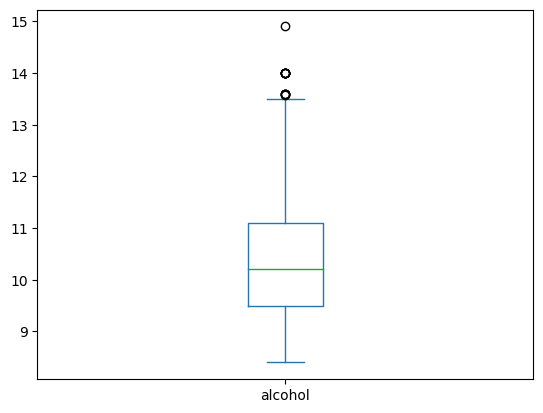

In [62]:
wine_df["alcohol"].plot(kind="box")

In [63]:
wine_df["alcohol"].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [64]:
wine_df["alcohol"].isnull().sum()

0

In [56]:
wine_df["pH"].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

In [57]:
wine_df["pH"].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

<Axes: >

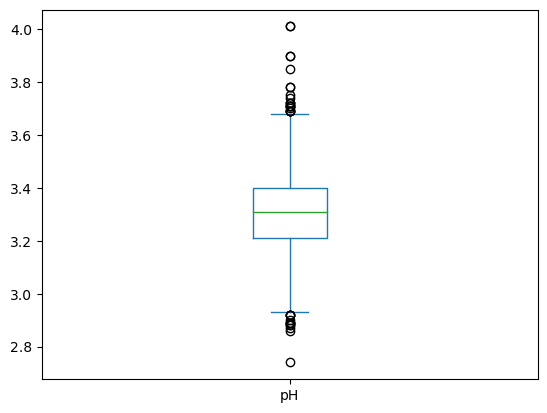

In [58]:
wine_df["pH"].plot(kind="box")

In [59]:
wine_df["pH"].isnull().sum()

0

In [51]:
wine_df["total sulfur dioxide"].value_counts()

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64

In [52]:
wine_df["total sulfur dioxide"].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

<Axes: >

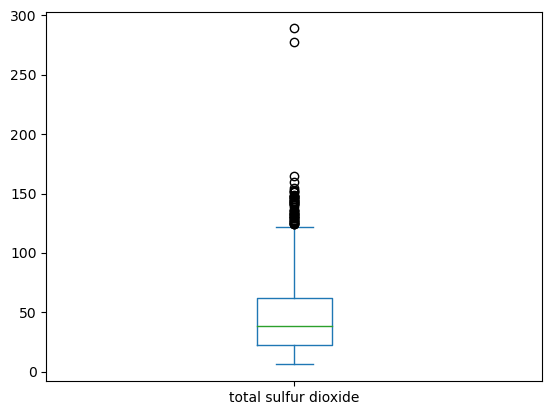

In [53]:
wine_df["total sulfur dioxide"].plot(kind="box")

In [54]:
wine_df["total sulfur dioxide"].isnull().sum()

0

In [47]:
wine_df["free sulfur dioxide"].value_counts()

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64

In [48]:
wine_df["free sulfur dioxide"].describe()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

<Axes: >

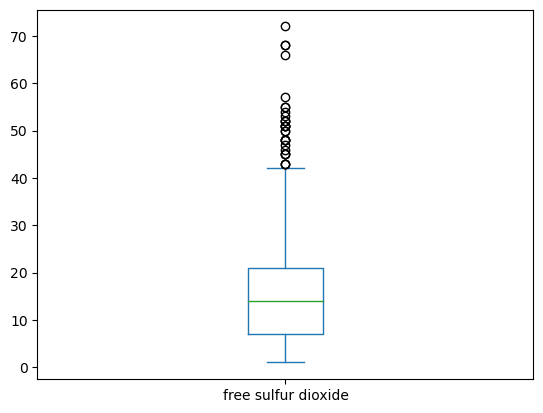

In [49]:
wine_df["free sulfur dioxide"].plot(kind="box")

In [50]:
wine_df["free sulfur dioxide"].isnull().sum()

0

In [43]:
wine_df["chlorides"].value_counts()

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64

In [44]:
wine_df["chlorides"].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

<Axes: >

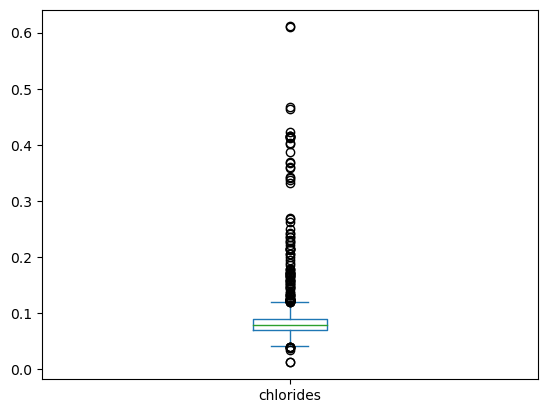

In [45]:
wine_df["chlorides"].plot(kind="box")

In [46]:
wine_df["chlorides"].isnull().sum()

0

In [39]:
wine_df["residual sugar"].value_counts()

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64

In [40]:
wine_df["residual sugar"].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

<Axes: >

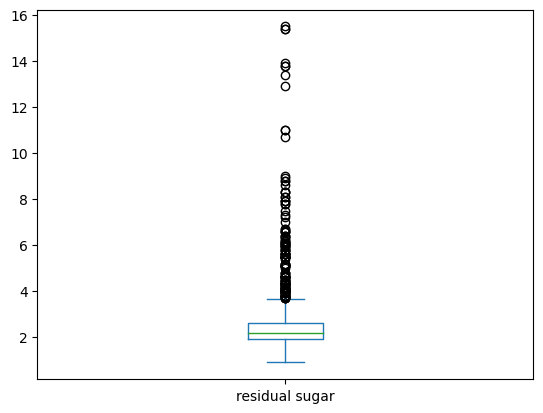

In [41]:
wine_df["residual sugar"].plot(kind="box")

In [42]:
wine_df["residual sugar"].isnull().sum()

0

In [35]:
wine_df["citric acid"].value_counts()

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64

In [36]:
wine_df["citric acid"].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

<Axes: >

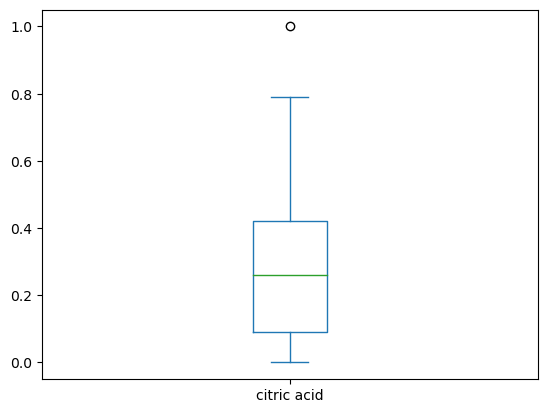

In [37]:
wine_df["citric acid"].plot(kind="box")

In [38]:
wine_df["citric acid"].isnull().sum()

0

In [31]:
wine_df["volatile acidity"].value_counts()

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64

In [32]:
wine_df["volatile acidity"].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

<Axes: >

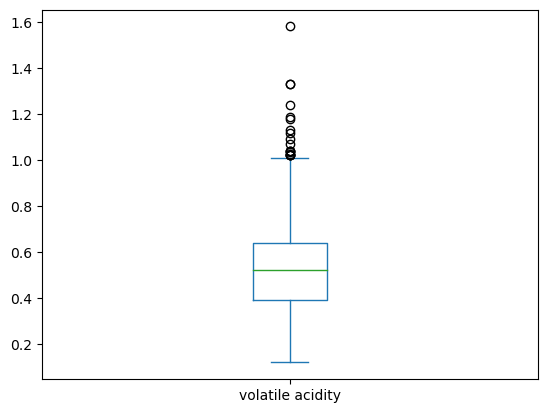

In [33]:
wine_df["volatile acidity"].plot(kind="box")

In [34]:
wine_df["volatile acidity"].isnull().sum()

0

In [26]:
wine_df["fixed acidity"].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

In [27]:
wine_df["fixed acidity"].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

<Axes: >

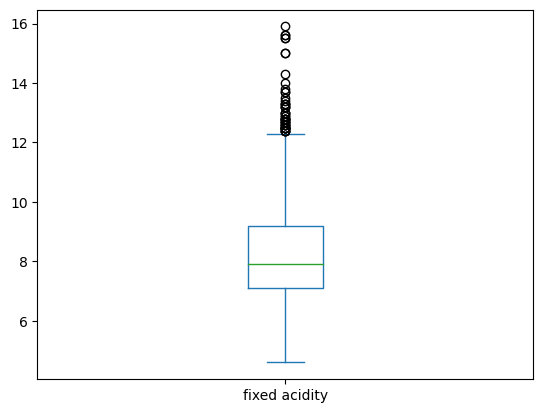

In [28]:
wine_df["fixed acidity"].plot(kind="box")

In [29]:
wine_df["fixed acidity"].isnull().sum()

0

In [21]:
wine_df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [22]:
wine_df["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<Axes: >

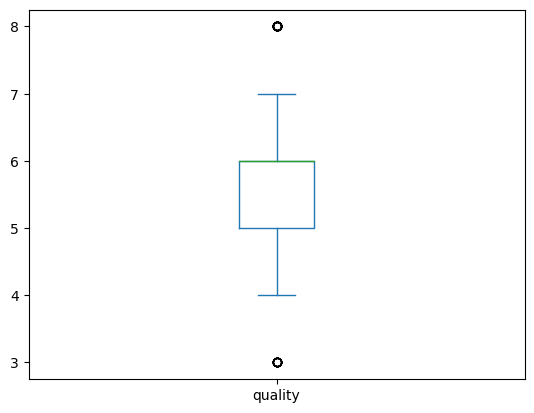

In [23]:
wine_df["quality"].plot(kind="box")

In [24]:
wine_df["quality"].isnull().sum()

0

<Axes: ylabel='Frequency'>

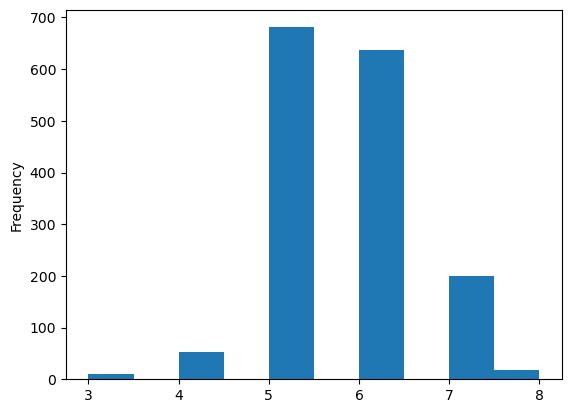

In [25]:
wine_df["quality"].plot(kind="hist")

# number of values for each quality
Overall, this code is useful for visualizing the distribution of the quality variable in the wine_df dataframe.

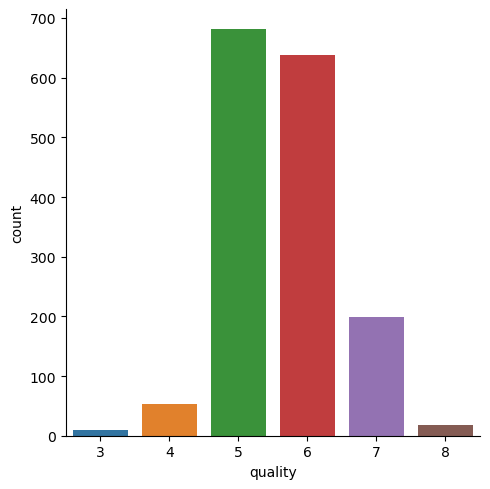

In [6]:
sns.catplot(x='quality',data=wine_df,kind='count')

# volatile acidity vs Quality
A bar plot is a type of plot that shows the relationship between a categorical variable and a continuous variable using bars. In this case, the quality variable is a categorical variable with values ranging from 3 to 9, and the volatile acidity variable is a continuous variable representing the level of volatile acidity in each wine sample.

The height of each bar represents the average volatile acidity level for each quality score. This plot can help us understand the relationship between quality and volatile acidity, and how volatile acidity levels vary across different quality scores.

<Axes: xlabel='quality', ylabel='volatile acidity'>

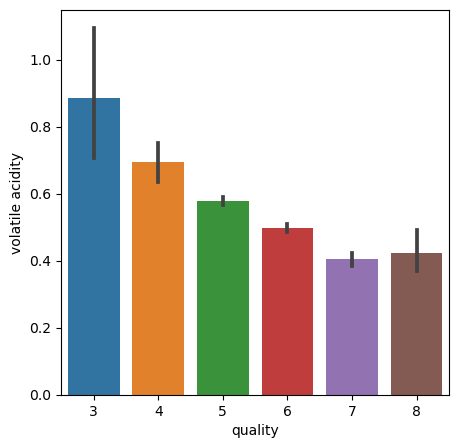

In [7]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

# citric acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

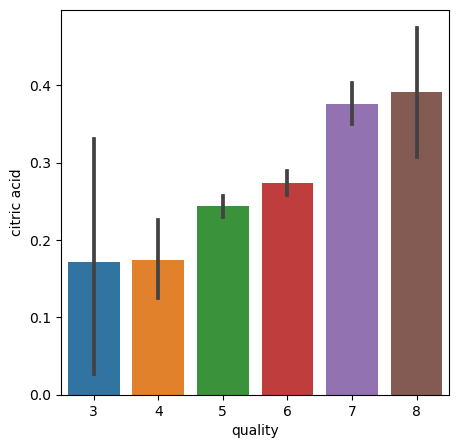

In [8]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_df)

# Correlation                              
is a statistical measure that describes the degree to which two variables are related to each other. It indicates the strength and direction of the relationship between the variables.

# Positive correlation                           
refers to a relationship between two variables in which they both move in the same direction. That is, as one variable increases, the other variable also increases. For example, there is a positive correlation between a person's age and their income, as older people tend to have higher incomes.

# Negative correlation                              
, on the other hand, refers to a relationship between two variables in which they move in opposite directions. That is, as one variable increases, the other variable decreases. For example, there is a negative correlation between the amount of exercise a person does and their weight, as people who exercise more tend to weigh less.

In [9]:
correlation = wine_df.corr()

# constructing a heatmap to understand the correlation between the columns

A heatmap is a type of plot that displays the correlation matrix between different variables using colors. The cells of the heatmap are color-coded based on the correlation coefficient values. Positive correlations are shown in shades of blue, while negative correlations are shown in shades of red.

This code is useful for visualizing the correlations between different variables in a dataset. The heatmap() function is particularly useful for datasets with a large number of variables, as it allows for easy identification of correlations between different pairs of variables. The annot parameter adds numerical values to the heatmap cells, which can help in interpreting the correlation matrix. The square parameter ensures that the cells are square-shaped, which can make the heatmap easier to read.

<Axes: >

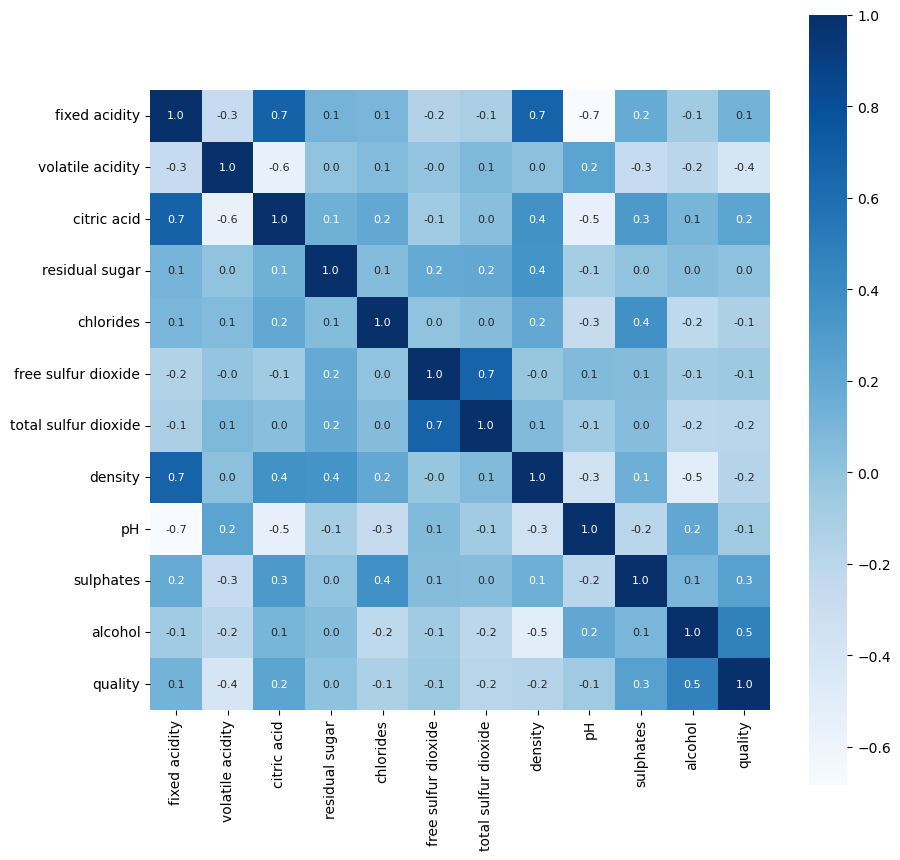

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,fmt=".1f",annot_kws={"size":8},cmap='Blues')

# separate the data and Label

In [11]:
X = wine_df.drop('quality',axis=1)

In [12]:
y = wine_df['quality'].apply(lambda yval:1 if yval>=7 else 0)

In [13]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Train & Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [15]:
print(y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Model Training:

# Random Forest Classifier

In [16]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

Accuracy Score

In [17]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(accuracy_score(X_test_prediction, Y_test))

0.934375


# Building a Predictive System

In [18]:
input_data = (6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6)
np_input_data = np.asarray(input_data)
reshaped_data = np_input_data.reshape(1,-1)
predict = model.predict(reshaped_data)

if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
wine_df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
644,9.9,0.540,0.45,2.30,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5
1481,8.2,0.280,0.60,3.00,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5
253,7.7,0.775,0.42,1.90,0.092,8.0,86.0,0.99590,3.23,0.59,9.5,5
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1197,7.7,0.570,0.21,1.50,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6
1325,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
1282,7.9,0.765,0.00,2.00,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6
184,6.7,0.620,0.21,1.90,0.079,8.0,62.0,0.99700,3.52,0.58,9.3,6
868,6.8,0.560,0.22,1.80,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6
1518,7.4,0.470,0.46,2.20,0.114,7.0,20.0,0.99647,3.32,0.63,10.5,5
